<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
# %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
    !pip install Compstats
    # !pip install -U git+https://github.com/INGEOTEC/CompStats@develop

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance` function is used to calculate and analyze the performance of machine learning models. On the other hand, the `plot_performance` function visualizes the performance metrics calculated by `performance`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference` and `plot_difference`; `difference` assesses the differences in performance between models in comparison to the best system, and `plot_difference` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [36]:
from CompStats import performance, plot_performance
from CompStats import difference, plot_difference
from CompStats import all_differences, difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error as mae 
import pandas as pd

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
DATA = 'RES-MEX2021_recomendation.csv'

`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
df = pd.read_csv(DATA)

The first five rows of `df` are shown below. It can be observed that the first column contains the gold standard, identified with `y`, and the rest of the columns are the predictions performed by different systems.

In [7]:
df

,y,Alumni.MCE.2GEN.run1,Alumni.MCE.2GEN.run2,jorge.hermosillo.recommendation,mayoritariaRecomendacion
0,5,5,5,4,5
1,5,5,5,5,5
2,5,5,5,4,5
3,5,5,5,1,5
4,5,5,5,1,5
...,...,...,...,...,...
676,1,5,5,1,5
677,1,5,5,3,5
678,1,5,5,1,5
679,1,5,5,5,5


# Performance Anaylisis

Let us start with the performance analysis of the different systems. The performance metric used is the weighted average F1 score. This performance is coded in the variable `score` as observed in the next instruction.

In [8]:
score = lambda y, hy: mae(y, hy)

The next step is to compute the performance on the bootstrap samples; this is done with the function `performance`. The function has a few parameters; one is the `score`, which receives the metric used to measure the performance.

In [212]:
perf = performance(df, score=score,num_samples=1000)

100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


In [213]:
for key, value in perf.calls.items():
    result = measurements.CI(value)
    media = np.mean(value)
    print(f"Key: {key}, CI: {result}, mean={media:.4f}")

Key: Alumni.MCE.2GEN.run1, CI: (0.26134361233480174, 0.3656387665198238), mean=0.3099
Key: Alumni.MCE.2GEN.run2, CI: (0.2730910425844347, 0.3788546255506608), mean=0.3218
Key: jorge.hermosillo.recommendation, CI: (1.5711820851688694, 1.7547723935389135), mean=1.6631
Key: mayoritariaRecomendacion, CI: (0.6534508076358296, 0.7959251101321585), mean=0.7237


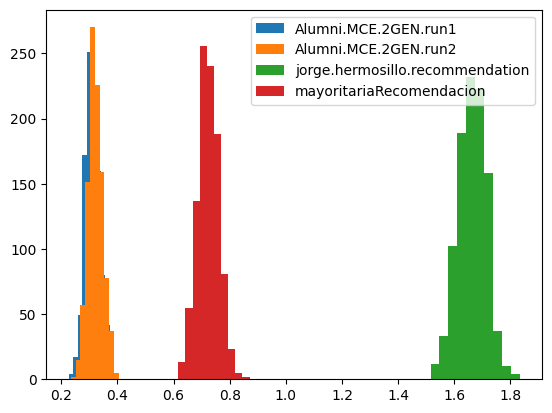

In [214]:
for key, value in perf.calls.items():
    plt.hist(value,label=key)
plt.legend(loc='upper right')    

`perf` is an instance of `StatisticSamples`, the bootstrap samples can be seen on the property `calls`. The first five bootstrap samples of the performance of INGEOTEC are shown below. -- It verifies that the key is in the dictionary in case the dataset has been changed. --

In [215]:
if 'jorge.hermosillo.recommendation' in perf.calls:
  print(f"{perf.calls['jorge.hermosillo.recommendation'][:5]}")

[1.72099853 1.72246696 1.64317181 1.68428781 1.66960352]


The performance of the systems, along with their confidence intervals, can be seen using the next instruction.

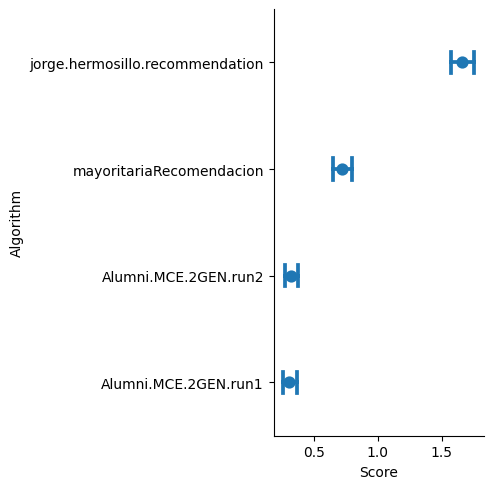

In [216]:
face_grid = plot_performance(perf)

It can be observed that the best system is 'Alumni.MCE.2GEN.run1'. Although the confidence intervals provide information that helps to assess the difference in the performance of the systems, in this case, the intervals intersect. Therefore, one needs another statistical tool to determine if the difference in performance is significant.

# Performance Comparison against the Winner

The difference in their performance compared to the best-performing system can be used to compare the algorithms analyzed. The function `difference` computes the difference as shown below.

In [225]:
diff = difference(perf,best_index = 0) 
# importante
# si la métrica es mayor es mejor best_index = -1
# si la métrica es mayor es mejor best_index = 0


`diff` is an instance of `StatisticSamples`; one can find the best system on the property `info`, as the following instruction shows.

In [226]:
diff.info

{'best': 'Alumni.MCE.2GEN.run1'}

CI for the difference against the winner.

In [227]:
# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements
from CompStats.bootstrap import StatisticSamples
import numpy as np
def plot_difference_paso(statistic_samples: StatisticSamples, CI: float=0.05,
                    var_name='Comparison', value_name='Difference',
                    set_refline=True, set_title=True,
                    hue='Significant', palette=None,
                    **kwargs):
    """Plot the difference in performance with its confidence intervals
    
    >>> from CompStats import performance, difference, plot_difference
    >>> from CompStats.tests.test_performance import DATA
    >>> from sklearn.metrics import f1_score
    >>> import pandas as pd
    >>> df = pd.read_csv(DATA)
    >>> score = lambda y, hy: f1_score(y, hy, average='weighted')
    >>> perf = performance(df, score=score)
    >>> diff = difference(perf)
    >>> ins = plot_difference(diff)
    """

    df2 = pd.DataFrame(statistic_samples.calls).melt(var_name=var_name,
                                                     value_name=value_name)
    if hue is not None:
        df2[hue] = True
    at_least_one = False
    for key, (left, right) in measurements.CI(statistic_samples, alpha=CI).items():
        if left < 0 < right:
            rows = df2[var_name] == key
            df2.loc[rows, hue] = False
            at_least_one = True
    if at_least_one and palette is None:
        palette = ['r', 'b']
    f_grid = plot_performance(df2, var_name=var_name,
                              value_name=value_name, hue=hue,
                              palette=palette,
                              **kwargs)
    if set_refline:
        f_grid.refline(x=0)
    if set_title:
        best = statistic_samples.info['best']
        f_grid.facet_axis(0, 0).set_title(f'Best: {best}')
    return f_grid



In [228]:
for key, value in diff.calls.items():
    result = measurements.CI(value)
    media = np.mean(value)
    print(f"Key: {key}, CI: {result}, mean={media:.4f}")

Key: Alumni.MCE.2GEN.run2, CI: (-0.02496328928046987, 0.001468428781204123), mean=-0.0119
Key: mayoritariaRecomendacion, CI: (-0.47433920704845817, -0.35972834067547726), mean=-0.4138
Key: jorge.hermosillo.recommendation, CI: (-1.4581497797356828, -1.2480910425844347), mean=-1.3531


The difference in performance can be visualized with the following instruction.

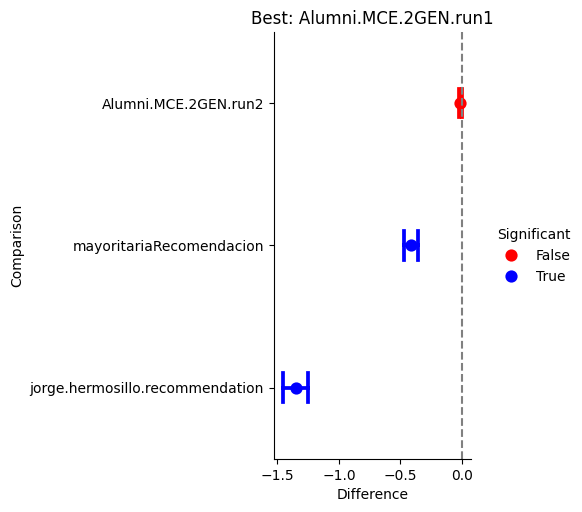

In [230]:
face_grid_diff = plot_difference_paso(diff)

Text(0.5, 1.0, 'Ganador: Alumni.MCE.2GEN.run1')

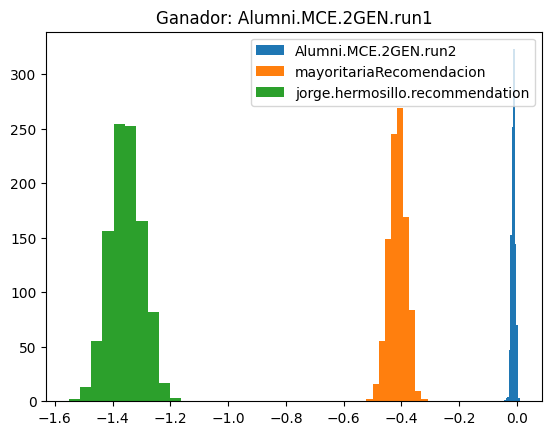

In [234]:
for key, value in diff.calls.items():
    plt.hist(value,label=key)
plt.legend(loc='upper right')    
plt.title(f"Ganador: {diff.info['best']}" )

From the performance graphs, for this example, we can observe that the ranking is *INGEOTEC*, *BoW*, *StackBoW*, *BoW (Corpus)*, *Dense*, *Bow (Class Weight)*. Hence, in the last graph, we analyze the performance difference against the winner (INGEOTEC). From this graph, we can conclude that *BoW* and *StackBoW*, might perform similarly to INGEOTEC.

Should we test the hypothesis of equality versus difference, considering that one system outperforms the other in the test? To address this question, we compare the performance of two systems, $A$ and $B$, to determine whether $A$ is superior to $B$ in a larger data population, represented as $\theta_A > \theta_B$. We can estimate the p-value associated with the hypothesis test $H_0: \theta_A \le \theta_B$ vs $H_1: \theta_A > \theta_B$ given the data, equivalently $H_0: \theta_A< -  \theta_B\le 0$ vs $H_1: \theta_A - \theta_B > 0$. The p-values for these differences can be estimated using the following instruction, comparing them against the winner (INGEOTEC) to determine the probability that $a$ (INGEOTEC) is better than $b$.

The `difference_p_value` function estimates the p-value for each difference in comparison to the best system, as illustrated below.


In [269]:
def difference_p_value_paso(samples: np.ndarray, BiB: bool = True):
    """Compute the difference p-value"""
    if isinstance(samples, StatisticSamples):
        if BiB:
            return {k: (v > 2 * np.mean(v)).mean() for k, v in samples.calls.items()}
        else:
            return {k: (v < 2 * np.mean(v)).mean() for k, v in samples.calls.items()}
    else:
        if BiB:
            return np.mean(samples > 2 * np.mean(samples, axis=0), axis=0)
        else:
            return np.mean(samples < 2 * np.mean(samples, axis=0), axis=0)

In [248]:
p_values = difference_p_value_paso(diff,BiB=False)

For a given $\alpha$ level, p-values smaller than $\alpha$  are significant, meaning the observed difference is unlikely to be due to chance. An $\alpha$ level of 0.05 is commonly used.

In [249]:
p_values

{'Alumni.MCE.2GEN.run2': 0.034,
 'mayoritariaRecomendacion': 0.0,
 'jorge.hermosillo.recommendation': 0.0}

In [255]:
#comparacon = 'mayoritariaRecomendacion'
comparacon = 'Alumni.MCE.2GEN.run2'
may2 = np.mean(diff.calls[comparacon] < 2 * np.mean(diff.calls[comparacon], axis=0), axis=0)
men0 = np.mean(diff.calls[comparacon] > 0, axis=0)
print(f"Mayor que 2V: {may2}")
print(f"Menor que 0 : {men0}")

Mayor que 2V: 0.034
Menor que 0 : 0.029


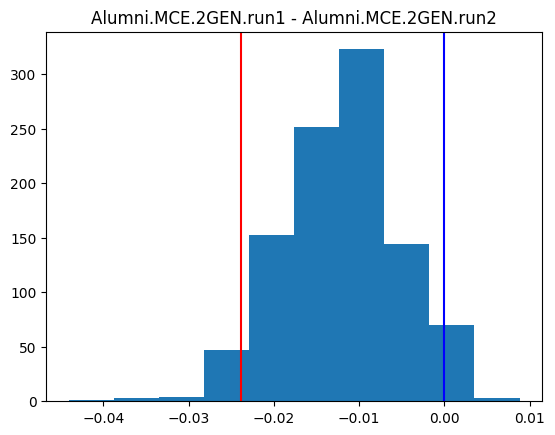

In [256]:

plt.hist(diff.calls[comparacon])
plt.title(f"Alumni.MCE.2GEN.run1 - {comparacon}")
plt.axvline(x = 0, color = 'b', label = '0')
plt.axvline(x = 2 * np.mean(diff.calls[comparacon], axis=0), color = 'r', label = '0')

In [257]:
result = multipletests(list(p_values.values()), method='bonferroni')
p_valuesC = dict(zip(p_values.keys(),result[1]))
p_valuesC

{'Alumni.MCE.2GEN.run2': 0.10200000000000001,
 'mayoritariaRecomendacion': 0.0,
 'jorge.hermosillo.recommendation': 0.0}

# Performance comparison between all models

Similarly, the differences for each pair of variables between all models can be estimated using the function `all_differences`, as illustrated in the following instructions. This approach allows for a comprehensive analysis of how each model compares to the others, providing a statistical basis to understand the significance of performance variations among them. This method extends the comparative analysis, offering a detailed view of the competitive landscape of model performance.

In [262]:
all_diff = all_differences(perf, reverse=False)
# reverse = False cuando Menor es mejor
# reverse = True  cuando Mayor es mejor

In [263]:
all_diff.calls

{'Alumni.MCE.2GEN.run1 - Alumni.MCE.2GEN.run2': array([-0.02349486, -0.010279  , -0.00293686, -0.01468429, -0.010279  ,
        -0.010279  , -0.02349486, -0.00440529, -0.00881057, -0.020558  ,
        -0.010279  , -0.00881057, -0.00440529, -0.01321586, -0.010279  ,
        -0.01468429, -0.01762115, -0.00293686, -0.01174743, -0.00587372,
        -0.01321586, -0.01321586, -0.00440529, -0.00587372, -0.00734214,
        -0.00881057,  0.        , -0.02202643, -0.020558  , -0.01174743,
        -0.00734214, -0.01908957, -0.01615272, -0.010279  , -0.00587372,
        -0.01174743, -0.01468429, -0.01174743, -0.00587372, -0.01908957,
        -0.01762115, -0.01321586,  0.00146843, -0.01468429, -0.01468429,
        -0.00734214, -0.01321586, -0.01762115, -0.01468429, -0.01174743,
        -0.00440529, -0.00734214, -0.010279  , -0.01174743, -0.00734214,
        -0.01615272, -0.01321586, -0.00734214, -0.02643172, -0.00734214,
         0.00293686, -0.00587372, -0.010279  , -0.01174743, -0.020558  ,
    

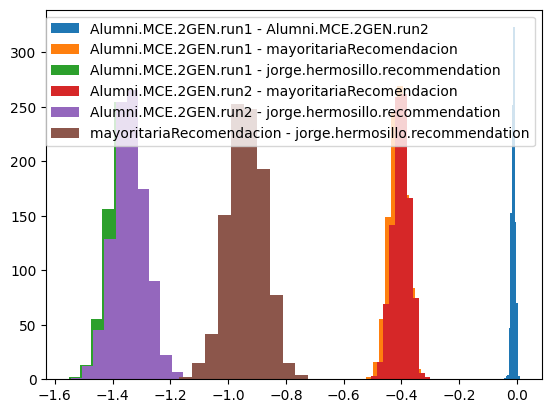

In [273]:
for key, value in all_diff.calls.items():
    plt.hist(value,label=key)
plt.legend(loc='upper right')    

Once again, we use the function `difference_p_value` to estimate the p-value.

In [277]:
p_values = difference_p_value_paso(all_diff,BiB=False)

And we can analyze from all pairs of systems individually which ones have significantly different performances by comparing their p-value with $\alpha$.

In [278]:
p_values

{'Alumni.MCE.2GEN.run1 - Alumni.MCE.2GEN.run2': 0.034,
 'Alumni.MCE.2GEN.run1 - mayoritariaRecomendacion': 0.0,
 'Alumni.MCE.2GEN.run1 - jorge.hermosillo.recommendation': 0.0,
 'Alumni.MCE.2GEN.run2 - mayoritariaRecomendacion': 0.0,
 'Alumni.MCE.2GEN.run2 - jorge.hermosillo.recommendation': 0.0,
 'mayoritariaRecomendacion - jorge.hermosillo.recommendation': 0.0}

When conducting numerous comparisons or hypothesis tests on a dataset, the risk of incurring Type I errors (incorrectly dismissing a valid null hypothesis) increases. This happens because more tests performed increase the probability of randomly identifying statistically significant outcomes. Implementing adjustments for multiple comparisons is critical for several reasons: (1) To manage the risk of Type I Error, (2) To prevent erroneous conclusions, and (3) To uphold the integrity of the research.

The following code illustrates the effect of these methods for multiple comparison corrections. The function `multipletests` makes the p-value correction by selecting the parameter `method`. In this example, the Bonferroni correction method is used.

In [281]:
result = multipletests(list(p_values.values()), method='bonferroni')

`result` is an array; next, we convert it back into a dictionary.

In [282]:
p_valuesC = dict(zip(p_values.keys(),result[1]))

And we can analyze from all pairs of systems simunstally which ones have significantly different performances by comparing their p-value with $\alpha$.

In [283]:
p_valuesC

{'Alumni.MCE.2GEN.run1 - Alumni.MCE.2GEN.run2': 0.20400000000000001,
 'Alumni.MCE.2GEN.run1 - mayoritariaRecomendacion': 0.0,
 'Alumni.MCE.2GEN.run1 - jorge.hermosillo.recommendation': 0.0,
 'Alumni.MCE.2GEN.run2 - mayoritariaRecomendacion': 0.0,
 'Alumni.MCE.2GEN.run2 - jorge.hermosillo.recommendation': 0.0,
 'mayoritariaRecomendacion - jorge.hermosillo.recommendation': 0.0}